# Text Processing

## Capturing Text Data

### Plain Text

In [1]:
import os

# Read in a plain text file
#with open(os.path.join("data", "hieroglyph.txt"), "r") as f:
with open("hieroglyph.txt", "r") as f:
    text = f.read()
    print(text)

Hieroglyphic writing dates from c. 3000 BC, and is composed of hundreds of symbols. A hieroglyph can represent a word, a sound, or a silent determinative; and the same symbol can serve different purposes in different contexts. Hieroglyphs were a formal script, used on stone monuments and in tombs, that could be as detailed as individual works of art.



### Tabular Data

In [2]:
import pandas as pd

# Extract text column from a dataframe
#df = pd.read_csv(os.path.join("data", "news.csv"))
df = pd.read_csv("news.csv")

In [3]:
df.head()

,id,title,url,publisher,category,story,hostname,timestamp
0,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
1,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
2,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
3,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
4,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1394470372212


In [4]:
df.head()[['publisher', 'title']]

,publisher,title
0,Livemint,Fed's Charles Plosser sees high bar for change...
1,IFA Magazine,US open: Stocks fall after Fed official hints ...
2,IFA Magazine,"Fed risks falling 'behind the curve', Charles ..."
3,Moneynews,Fed's Plosser: Nasty Weather Has Curbed Job Gr...
4,NASDAQ,Plosser: Fed May Have to Accelerate Tapering Pace


In [5]:
# Convert text column to lowercase
df['title'] = df['title'].str.lower()
df.head()[['publisher', 'title']]

,publisher,title
0,Livemint,fed's charles plosser sees high bar for change...
1,IFA Magazine,us open: stocks fall after fed official hints ...
2,IFA Magazine,"fed risks falling 'behind the curve', charles ..."
3,Moneynews,fed's plosser: nasty weather has curbed job gr...
4,NASDAQ,plosser: fed may have to accelerate tapering pace


### Online Resource

In [6]:
import requests
import json

# Fetch data from a REST API
r = requests.get(
    "https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent=4))

# Extract relevant object and field
q = res["contents"]["quotes"][0]
print(q["quote"], "\n--", q["author"])

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "Think in terms of opportunities and solutions instead of problems, disappointment, and failure.",
                "length": "95",
                "author": "Lorii Myers",
                "tags": {
                    "0": "failure",
                    "1": "inspire",
                    "2": "opportunity",
                    "3": "positive-attitude",
                    "5": "tso-management"
                },
                "category": "inspire",
                "language": "en",
                "date": "2020-06-30",
                "permalink": "https://theysaidso.com/quote/lorii-myers-think-in-terms-of-opportunities-and-solutions-instead-of-problems-di",
                "id": "F9MnDaQftE2TFpeIyCPB3geF",
                "background": "https://theysaidso.com/img/qod/qod-inspire.jpg",
                "title": "Inspiring Quote of the day"
            }
        ]


## Cleaning

In [7]:
import requests

# Fetch a web page
r = requests.get("https://news.ycombinator.com")
print(r.text)

<html lang="en" op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?lWjTR7Bo1FobbZdHztpg">
        <link rel="shortcut icon" href="favicon.ico">
          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">
        <title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">
        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.gif" width="18" height="18" style="border:1px white solid;"></a></td>
                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>
              <a href="newest">new</a> | <a href="front">past</a> | <a href=

There are many raw things we want to discard, so lets use regular expression

In [8]:
import re

# Remove HTML tags using RegEx
pattern = re.compile(r'<.*?>')  # tags look like <...>
print(pattern.sub('', r.text))  # replace them with blank


        
          
        Hacker News
        
                  Hacker News
              new | past | comments | ask | show | jobs | submit            
                              login
                          
              

              
      1.      The End of the Redis Adventure (antirez.com)
        1659 points by kristoff_it 9 hours ago  | hide | 229&nbsp;comments              
      
                
      2.      Linear – A fast issue tracker (linear.app)
        264 points by tommoor 4 hours ago  | hide | 124&nbsp;comments              
      
                
      3.      Learn Lua in 15 Minutes (2013) (tylerneylon.com)
        48 points by jakogut 1 hour ago  | hide | 21&nbsp;comments              
      
                
      4.      Holographic optics for thin and lightweight virtual reality (fb.com)
        223 points by onurcel 5 hours ago  | hide | 49&nbsp;comments              
      
                
      5.      The world should think better about cata

So, we can see that regular expression is also not really helpful to remove HTML tags, so lets use beautiful soup for it.

There are many free spaces between the text, we want to remove them. So, lets do it.

In [9]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text, "html5lib")
print(soup.get_text())


        
          
        Hacker News
        
                  Hacker News
              new | past | comments | ask | show | jobs | submit            
                              login
                          
              

              
      1.      The End of the Redis Adventure (antirez.com)
        1659 points by kristoff_it 9 hours ago  | hide | 229 comments              
      
                
      2.      Linear – A fast issue tracker (linear.app)
        264 points by tommoor 4 hours ago  | hide | 124 comments              
      
                
      3.      Learn Lua in 15 Minutes (2013) (tylerneylon.com)
        48 points by jakogut 1 hour ago  | hide | 21 comments              
      
                
      4.      Holographic optics for thin and lightweight virtual reality (fb.com)
        223 points by onurcel 5 hours ago  | hide | 49 comments              
      
                
      5.      The world should think better about catastrophic and existen

First of all do this step

1. Go to website: https://news.ycombinator.com
2. Right click on the page anywhere, and click on "Inspect" to view the html code of the page.
3. Find out the first class from the html code

We actually want to collect all the classes and then discard them

see the picture below

![pic](cc.PNG)

In [13]:
# Find all articles
summaries = soup.find_all("tr", class_="athing")
summaries[0]

<tr class="athing" id="23689549">
      <td align="right" class="title" valign="top"><span class="rank">1.</span></td>      <td class="votelinks" valign="top"><center><a href="vote?id=23689549&amp;how=up&amp;goto=news" id="up_23689549"><div class="votearrow" title="upvote"></div></a></center></td><td class="title"><a class="storylink" href="http://antirez.com/news/133">The End of the Redis Adventure</a><span class="sitebit comhead"> (<a href="from?site=antirez.com"><span class="sitestr">antirez.com</span></a>)</span></td></tr>

Since we want to fetch the plan text of the first title which is "The End of the Redis Adventure". 
So, look at the class which I extracted from the above text

<a class="storylink" href="http://antirez.com/news/133">The End of the Redis Adventure</a>

In [14]:
# Extract title
summaries[0].find("a", class_="storylink").get_text().strip()

'The End of the Redis Adventure'

In [20]:
# Find all articles, extract titles
articles = []
summaries = soup.find_all("tr", class_="athing")
for summary in summaries:
    title = summary.find("a", class_="storylink").get_text().strip()
    articles.append((title))

print(len(articles), "Article summaries found. Sample:")
print('Article title 1: ',articles[0])
print('Article title 10: ',articles[10])

30 Article summaries found. Sample:
Article title 1:  The End of the Redis Adventure
Article title 10:  Returning from a Year of Isolation in Antarctica


Lets Creat a dataframe and store all the tiles in the dataframe

In [31]:
import pandas as pd
data=pd.DataFrame(articles)
data.head()

,0
0,The End of the Redis Adventure
1,Linear – A fast issue tracker
2,Learn Lua in 15 Minutes (2013)
3,Holographic optics for thin and lightweight vi...
4,The world should think better about catastroph...


## Normalization

### Case Normalization

In [32]:
# Sample text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [33]:
# Convert to lowercase
text = text.lower() 
print(text)

the first time you see the second renaissance it may look boring. look at it at least twice and definitely watch part 2. it will change your view of the matrix. are the human people the ones who started the war ? is ai a bad thing ?


### Punctuation Removal

In [37]:
import re

# Remove punctuation characters
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
print(text)

the first time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


## Tokenization

In [38]:
# Split text into tokens (words)
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


### NLTK: Natural Language ToolKit

In [39]:
import os
import nltk
nltk.data.path.append(os.path.join(os.getcwd(), "nltk_data"))

In [40]:
# Another sample text
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [41]:
from nltk.tokenize import word_tokenize

# Split text into words using NLTK
words = word_tokenize(text)
print(words)

['Dr.', 'Smith', 'graduated', 'from', 'the', 'University', 'of', 'Washington', '.', 'He', 'later', 'started', 'an', 'analytics', 'firm', 'called', 'Lux', ',', 'which', 'catered', 'to', 'enterprise', 'customers', '.']


In [42]:
from nltk.tokenize import sent_tokenize

# Split text into sentences
sentences = sent_tokenize(text)
print(sentences)

['Dr. Smith graduated from the University of Washington.', 'He later started an analytics firm called Lux, which catered to enterprise customers.']


In [43]:
# List stop words
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
# Reset text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize it
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [45]:
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


### POS

In [47]:
from nltk import pos_tag

sentence = word_tokenize("I shot an elephant in my pajamas")
pos_tag(sentence)

[('I', 'PRP'),
 ('shot', 'VBP'),
 ('an', 'DT'),
 ('elephant', 'NN'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('pajamas', 'NN')]

### Sentence Parsing

In [49]:
import nltk

# Define a custom grammar
my_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
parser = nltk.ChartParser(my_grammar)

# Parse a sentence
sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
    print(tree)
    #visullize parts of speech
    tree.draw

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [51]:
#visullize parts of speech
for tree in parser.parse(sentence):
    tree.draw()

### Name Entity Recognition

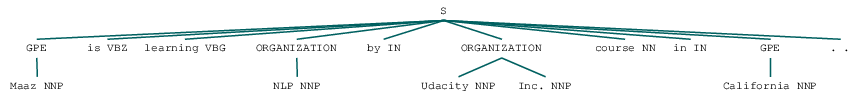

In [53]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize

sentence = word_tokenize("Maaz is learning NLP by Udacity Inc. course in California.")
ne_chunk(pos_tag(sentence))

## Stemming & Lemmatization

### Stemming

There are many stemmers like:
    1. PorterStemmer
    2. SnowballStemmer

In [56]:
from nltk.stem.porter import PorterStemmer



# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


The key difference between Stemming and Lemmatization if the following:
    1. Stemming is used to strip words by eleiminating "ing", "ed" etc to map to its real root.
                a. Example: brach, branches, braching, branched --> branch
    2. Lemmatization, however, used words present in a dictionary and map all the words in to its real root.
    It used WordNet database to reduce words to root form.
        a. Example: is, was, were --> be

### Lemmatization

In [57]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


To reduce words into root from, lemmazer needs to know its POS tag of a particular word.

By default, lemmatizer used pos=nouns, however, we can overwrite by changing "nouns" to "verbs"

In [58]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']


### Comparison between Stemming and Limmatization


Stemming sometimes results in stem that are not complete words in english. Limmatizztion is similair to stemming with one difference, in limmatization *the final form is also a meaningful word in English*.

![pic](xx.JPG)

Stemming is less memory intensive, on the other hand, Limmatization is high memory intensive since it needs dictionary of all the words.  


We can use both Stemming and Limmatization. If you we want to use both, then first use Limmatization and then stemming.

### Final Flow

![pic](fl.PNG)